In [ ]:
# 통계 기초
# 중심경향성 : 평균값(mean), 중앙값(median), 최빈값(mode)
# 산포도 : 분산, 표준편자, 사분범위
# 상관관계 : 공분산, 피어슨 상관관계

In [1]:
import matplotlib.pyplot as plt

In [5]:
import platform
import matplotlib.font_manager as fm # 폰트매니저
import os
import matplotlib.pyplot as plt

!apt -qq install fonts-nanum # 나눔폰트 설치
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name = 'NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # matplotlib에 폰트 추가
plt.rcParams.update({'font.size' : 12, 'font.family':'NanumGothic'})

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [6]:
# sns 회원 204명을 대상으로 친구가 몇명인지 조사한 결과를 리스트로 저장, 회원아이디는 친구가 많은 순서대로
# 0,1,2,... 등 으로 정렬되어 있고, 리스트의 각 항목이 해당 회원의 친구 숫자이다. 친구숫자 최대는 100, 최소 1명
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,
               15,15,15,14,14,13,13,13,13,12,12,11,10,10,
               10,10,10,10,10,10,10,10,10,10,10,10,10,9,
               9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,
               8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,
               7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
               4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [8]:
print(f'회원수:{len(num_friends)}명')
print(f'최대 친구 숫자:{max(num_friends)}명')
print(f'최소 친구 숫자:{min(num_friends)}명')

회원수:204명
최대 친구 숫자:100명
최소 친구 숫자:1명


In [ ]:
from collections import Counter # Counter라는 클래스 임포트
friends_counts = Counter(num_friends) # 객체 생성
friends_counts

In [10]:
xs = range(101) # 친구 숫자
ys = [friends_counts[x] for x in xs]

In [12]:
plt.rc('figure', figsize=(5,3))

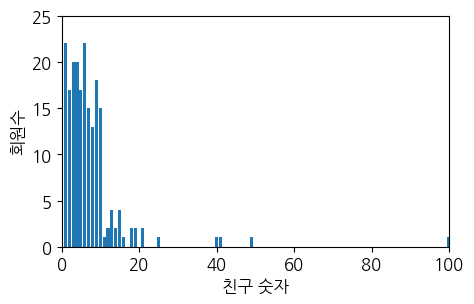

In [29]:
plt.bar(xs, ys)
plt.axis([0, 100, 0, 25])
plt.xlabel('친구 숫자')
plt.ylabel('회원수')
plt.show()
# 대다수 회원이 10명이내의 친구를 갖는다 => 중심경향성
# 100명의 친구를 가진 회원도 있다.

In [15]:
def mean(xs):
  return sum(xs) / len(xs)
mean(num_friends) # sns 친구 보유수 평균

7.333333333333333

In [16]:
def median(xs):
  if len(xs) % 2 ==0:
    return median_even(xs)
  else :
    return median_odd(xs)

def median_even(xs): # 짝수
  sorted_xs = sorted(xs)
  midpoint = len(xs) // 2
  mean_value = (sorted_xs[midpoint -1] + sorted_xs[midpoint]) / 2
  return mean_value

def median_odd(xs): # 홀수
  sorted_xs = sorted(xs)
  midpoint = len(xs) //2
  mean_value = sorted_xs[sorted_xs]
  return mean_value

In [17]:
median(num_friends) # 중앙값은 6

6.0

In [18]:
Y = num_friends.copy()
Y[0] = 200
mean(Y)
# 친구 숫자를 200으로 변경하면 평균은 올라갈 것이다.

7.823529411764706

In [19]:
median(Y) # 하지만, 중앙값은 변하지 않음

6.0

In [20]:
def quantile(xs, p):
  xs_sorted = sorted(xs)
  index = int(p * len(xs))
  return xs_sorted[index]

In [24]:
print('제1사분위수:', quantile(num_friends, 0.25))
print('제4사분위수:', quantile(num_friends, 0.75))

제1사분위수: 3
제4사분위수: 9


In [27]:
def mode(xs):
  counts = Counter(xs)
  max_count = max(counts.values())
  modes = {x_i for x_i, count in counts.items() if count == max_count}
  return modes

In [28]:
mode(num_friends)

{1, 6}

In [ ]:
xs = range(21) # 친구수 제한
ys = [friends_counts[x] for x in xs]
plt.bar(xs, ys)
import numpy as np
from scipy.interpolate import make_interp_spline # 부드러운선을 그리기 위한 스플라인 보간법 적용
spline = make_interp_spline(xs, ys)
xs_ = np.linspace(min(xs), max(ys), 500)
ys_ = spline(xs_)

plt.plot(xs_, ys_, 'r')
plt.axis([0, 20, 0, 25])
plt.xlabel('보유 친구 숫자')
plt.ylabel('회원수')
plt.show
# Right skew : 최빈값 < 중앙값 < 평균값

In [32]:
# 산포도 분산
def data_range(xs):
  return max(xs) - min(xs)
data_range(num_friends)

99

In [34]:
def iqr(xs):
  return quantile(xs, 0.75) - quantile(xs, 0.25) # 제3사분위 - 제1사분위
iqr(num_friends) # 사분범위

6

In [39]:
# 백터 내적
def dotV(v, w):
  assert len(v) == len(w)
  return sum(v_i * w_i for v_i, w_i in zip(v, w))
def dev_mean(xs): # 평균값과 차이
  mu = mean(xs)
  return [x - mu for x in xs]
def sum_of_squares(v):
  return dotV(v, v)

In [40]:
def var(xs):
  assert len(xs) >= 2
  n = len(xs)
  dev = dev_mean(xs)
  dev_sum = sum_of_squares(dev)
  return dev_sum / (n-1)

In [42]:
var(num_friends) # 분산구하기

81.54351395730716

In [43]:
import math
def std(xs):
  return math.sqrt(var(xs))

In [44]:
std(num_friends)
# 분산과 표준편차는 평균값에 의존적, 평균값 이상치에 영향을 받는만큼 따라서 영향을 받는다.

9.03014473623248

In [45]:
# sns 소비 시간
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,
                 31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,
                 36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,
                 23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,
                 26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,
                 27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,
                 23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,
                 31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,
                 29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,
                 35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,
                 19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,
                 15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,
                 18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,
                 41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,
                 27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,
                 36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,
                 28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,
                 36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,
                 33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,
                 13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,
                 28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,
                 30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,
                 17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,
                 33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [ ]:
# 공분산 : 두 데이터의 각각 평균값을 기준으로 어떻게 연관되어 있는지 계산 => 양, 음, 0

In [51]:
def cov(xs, ys): # 공분산 구하는 함수
  assert len(xs) == len(ys)
  return dotV(dev_mean(xs), dev_mean(ys)) / (len(xs) - 1)

In [52]:
cov(num_friends, daily_minutes) # 공분산은 22.42 정도이다.
# 공분산이 크다고 상관관계가 강하다라고 할 수 없음
# 피어슨 상관계수 : 공분산을 각 데이터셋의 표준편차의 곱으로 나눔(즉, 선형 상관관계를 계산, 공분산의 한계 해결)
# -1 ~ 1의 값을 갖는다.

22.425435139573064

In [54]:
def corrcoef(xs, ys):
  assert len(xs) == len(ys)
  std_x = std(xs) # 표준편차
  std_y = std(ys)
  if std_x > 0 and std_y > 0:
    return cov(xs, ys) / (std_x * std_y)
  else:
    return 0

In [55]:
corrcoef(num_friends, daily_minutes)

0.24736957366478216

In [ ]:
plt.scatter(num_friends, daily_minutes)
plt.xlabel('친구 보유 숫자')
plt.ylabel('sns 사용 시간')

In [57]:
outlier = num_friends.index(100)

num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]
corrcoef(num_friends_good, daily_minutes_good)

0.5736792115665573

Text(0, 0.5, 'sns 사용 시간')

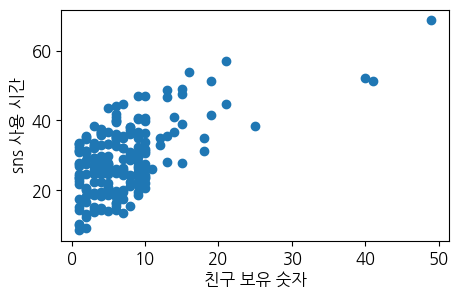

In [69]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.xlabel('친구 보유 숫자')
plt.ylabel('sns 사용 시간')

In [59]:
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]
corrcoef(x, y)
# 이런 데이터들은 상관계수를 구할 수 없음

0.0

In [60]:
x1 = [-2, -1, 0, 1, 2]
y1 = [99.98, 99.99, 100, 101.01, 100.02]
corrcoef(x1, y1)

0.38390264701787247

In [ ]:
# 선형 회귀 : 독립변수를 사용한다. => 외부 요인

In [65]:
from sklearn import linear_model

xs = np.c_[np.array(num_friends_good)]
ys = np.c_[np.array(daily_minutes_good)]

lin_model = linear_model.LinearRegression() # 선형회귀 객체를 생성
lin_model.fit(xs, ys) # 모델 피팅

t0, t1 = lin_model.intercept_[0], lin_model.coef_[0][0]
print(f'절편: {t0}')
print(f'기울기:{t1}')

절편: 22.947552413468976
기울기:0.9038659456058723


Text(0, 0.5, 'sns 사용 시간')

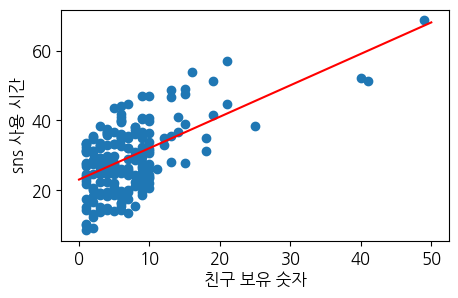

In [67]:
plt.scatter(num_friends_good, daily_minutes_good)
X = np.linspace(0, 50, 100)
plt.plot(X, t0 + t1*X, 'r')
plt.xlabel('친구 보유 숫자')
plt.ylabel('sns 사용 시간')